In [ ]:
#Image classification
# https://www.robots.ox.ac.uk/~vgg/data/pets/
#Oxford_pet : 37종 고양이, 개 데이터 셋
import os
import tensorflow as tf
from tensorflow import keras
import numpy as np
import re
import random
import matplotlib.pyplot as plt
from PIL import Image
import shutil
import gdown

url = 'http://drive.google.com/uc?id=1dIR9ANjUsV9dWa0pS9J0c2KUGMfpIRG0'
fname = 'Oxford_pet.zip'
gdown.download(url, fname, quiet=False)

Downloading...
From: http://drive.google.com/uc?id=1dIR9ANjUsV9dWa0pS9J0c2KUGMfpIRG0
To: /content/Oxford_pet.zip
811MB [00:10, 78.1MB/s]


'Oxford_pet.zip'

In [ ]:
# 압축 풀기
!unzip -q Oxford_pet.zip -d Oxford_pet

In [ ]:
# 현재 디렉토리 위치 / 디렉토리 설정
cur_dir = os.getcwd()
data_dir = os.path.join(cur_dir, 'Oxford_pet')
image_dir = os.path.join(data_dir, 'images')

In [ ]:
image_files = [fname for fname in os.listdir(image_dir) if os.path.splitext(fname)[-1]=='.jpg']
print(len(image_files))
image_files[:5]

7390


['Bengal_63.jpg',
 'Siamese_54.jpg',
 'leonberger_83.jpg',
 'chihuahua_24.jpg',
 'yorkshire_terrier_88.jpg']

In [ ]:
# channel이 3이 아닌 image 삭제_ 삭제하는건 2차원 흑백 사진 Or 투명도까지 가진 4차원
for image_file in image_files:
    image_path = os.path.join(image_dir, image_file)
    image = Image.open(image_path)
    image_mode = image.mode
    if image_mode != 'RGB':
        print(image_file, image_mode)
        image = np.asarray(image)
        print(image.shape)
        os.remove(image_path)

Egyptian_Mau_139.jpg P
(250, 350)
Egyptian_Mau_177.jpg P
(175, 246)
Abyssinian_34.jpg P
(202, 250)
Egyptian_Mau_129.jpg L
(325, 299)
Egyptian_Mau_167.jpg P
(275, 183)
Egyptian_Mau_186.jpg RGBA
(275, 183, 4)
Abyssinian_5.jpg RGBA
(150, 200, 4)
staffordshire_bull_terrier_2.jpg L
(282, 500)
Egyptian_Mau_14.jpg RGBA
(800, 582, 4)
Egyptian_Mau_191.jpg P
(214, 300)
Egyptian_Mau_145.jpg P
(188, 216)
staffordshire_bull_terrier_22.jpg L
(500, 364)


In [ ]:
image_files = [fname for fname in os.listdir(image_dir) if os.path.splitext(fname)[-1]=='.jpg']
print(len(image_files))

7378


In [ ]:
class_list = set() # set : 중복 허용 X
for image_file in image_files :
    file_name = os.path.splitext(image_file)[0] # 확장자를 빼줌
    class_name = re.sub('_\d+','', file_name)
    class_list.add(class_name)
class_list = list(class_list)
print(len(class_list)) # 동물 종을 모음
print(type(class_list))

37
<class 'list'>


In [ ]:
class_list.sort()
class_list

['Abyssinian',
 'Bengal',
 'Birman',
 'Bombay',
 'British_Shorthair',
 'Egyptian_Mau',
 'Maine_Coon',
 'Persian',
 'Ragdoll',
 'Russian_Blue',
 'Siamese',
 'Sphynx',
 'american_bulldog',
 'american_pit_bull_terrier',
 'basset_hound',
 'beagle',
 'boxer',
 'chihuahua',
 'english_cocker_spaniel',
 'english_setter',
 'german_shorthaired',
 'great_pyrenees',
 'havanese',
 'japanese_chin',
 'keeshond',
 'leonberger',
 'miniature_pinscher',
 'newfoundland',
 'pomeranian',
 'pug',
 'saint_bernard',
 'samoyed',
 'scottish_terrier',
 'shiba_inu',
 'staffordshire_bull_terrier',
 'wheaten_terrier',
 'yorkshire_terrier']

In [ ]:
# 인덱스까지 넣어서 딕셔너리를 만듦
class2idx = {cls:idx for idx, cls in enumerate(class_list)}
class2idx

{'Abyssinian': 0,
 'Bengal': 1,
 'Birman': 2,
 'Bombay': 3,
 'British_Shorthair': 4,
 'Egyptian_Mau': 5,
 'Maine_Coon': 6,
 'Persian': 7,
 'Ragdoll': 8,
 'Russian_Blue': 9,
 'Siamese': 10,
 'Sphynx': 11,
 'american_bulldog': 12,
 'american_pit_bull_terrier': 13,
 'basset_hound': 14,
 'beagle': 15,
 'boxer': 16,
 'chihuahua': 17,
 'english_cocker_spaniel': 18,
 'english_setter': 19,
 'german_shorthaired': 20,
 'great_pyrenees': 21,
 'havanese': 22,
 'japanese_chin': 23,
 'keeshond': 24,
 'leonberger': 25,
 'miniature_pinscher': 26,
 'newfoundland': 27,
 'pomeranian': 28,
 'pug': 29,
 'saint_bernard': 30,
 'samoyed': 31,
 'scottish_terrier': 32,
 'shiba_inu': 33,
 'staffordshire_bull_terrier': 34,
 'wheaten_terrier': 35,
 'yorkshire_terrier': 36}

In [ ]:
# 인덱스가 나옴
class2idx['scottish_terrier']

32

In [ ]:
# 이미지 이름순으로 정렬
image_files.sort()
image_files[:10]

['Abyssinian_1.jpg',
 'Abyssinian_10.jpg',
 'Abyssinian_100.jpg',
 'Abyssinian_101.jpg',
 'Abyssinian_102.jpg',
 'Abyssinian_103.jpg',
 'Abyssinian_104.jpg',
 'Abyssinian_105.jpg',
 'Abyssinian_106.jpg',
 'Abyssinian_107.jpg']

In [ ]:
train_dir = os.path.join(data_dir, 'train')
val_dir = os.path.join(data_dir, 'val')
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

In [ ]:
# 1 class당 이미지 약 200장 / 160장은 train, 40장은 test로 쓸거임
cnt = 0
previous_class = ""
for image_file in image_files :
    file_name = os.path.splitext(image_file)[0]
    class_name = re.sub('_\d+', '', file_name)
    if class_name == previous_class :
       cnt += 1
    else :
      cnt = 1
    if cnt <= 160:
      cpath = train_dir
    else :
      cpath = val_dir
    
    image_path = os.path.join(image_dir, image_file)
    shutil.copy(image_path, cpath)
    previous_class = class_name    

In [ ]:
train_images = os.listdir(train_dir)
val_images = os.listdir(val_dir)

print(len(train_images), len(val_images))

5920 1458


In [ ]:
train_images[:5]

['Siamese_54.jpg',
 'chihuahua_24.jpg',
 'basset_hound_50.jpg',
 'miniature_pinscher_175.jpg',
 'great_pyrenees_60.jpg']

# TF 레코드 파일 만들기
- 텐서플로우를 위한 바이너리 파일

In [ ]:
IMG_SIZE = 224
# TF 저장할 디렉터리와 파일 경로 설정
tfr_dir = os.path.join(data_dir, 'tfrecord')
os.makedirs(tfr_dir, exist_ok=True)

tfr_train_dir = os.path.join(tfr_dir, 'cls_train.tfr')
tfr_val_dir = os.path.join(tfr_dir, 'cls_val.tfr')

# tf writer 생성
writer_train = tf.io.TFRecordWriter(tfr_train_dir)
writer_val = tf.io.TFRecordWriter(tfr_val_dir)

In [ ]:
# The following functions can be used to convert a value to a type compatible
# with tf.train.Example.

def _bytes_feature(value):
  """Returns a bytes_list from a string / byte."""
  if isinstance(value, type(tf.constant(0))):
    value = value.numpy() # BytesList won't unpack a string from an EagerTensor.
  return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def _float_feature(value):
  """Returns a float_list from a float / double."""
  return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))

def _int64_feature(value):
  """Returns an int64_list from a bool / enum / int / uint."""
  return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

# train data로 tfrecord 만들기
n_train = 0
train_files = os.listdir(train_dir)

for train_file in train_files:
  train_path = os.path.join(train_dir, train_file)
  image = Image.open(train_path)
  image = image.resize((IMG_SIZE, IMG_SIZE))
  bimage = image.tobytes()
  file_name = os.path.splitext(train_file)[0] # 확장자를 빼줌
  class_name = re.sub('_\d+','', file_name)
  class_num = class2idx[class_name] #종 번호로 바꿈

  example = tf.train.Example(features=tf.train.Features(feature={
            'image': _bytes_feature(bimage),
            'cls_num':_int64_feature(class_num) 
  }))
  writer_train.write(example.SerializeToString())
  n_train += 1
  
writer_train.close()
print(n_train)  

5920


In [ ]:
# val data로 tfrecord 만들기
n_val = 0
val_files = os.listdir(val_dir)

for val_file in val_files:
  val_path = os.path.join(val_dir, val_file)
  image = Image.open(val_path)
  image = image.resize((IMG_SIZE, IMG_SIZE))
  bimage = image.tobytes()
  file_name = os.path.splitext(val_file)[0] # 확장자를 빼줌
  class_name = re.sub('_\d+','', file_name)
  class_num = class2idx[class_name] #종 번호로 바꿈

  example = tf.train.Example(features=tf.train.Features(feature={
            'image': _bytes_feature(bimage),
            'cls_num':_int64_feature(class_num) 
  }))
  writer_val.write(example.SerializeToString())
  n_val += 1
  
writer_val.close()
print(n_val)  

1458


In [ ]:
# tf파일 생성
!ls -l $tfr_dir

total 1085016
-rw-r--r-- 1 root root 891486880 Jan 20 12:00 cls_train.tfr
-rw-r--r-- 1 root root 219558762 Jan 20 12:01 cls_val.tfr


# Classfication 분류

In [ ]:
N_CLASS = len(class_list)
N_EPOCHS = 20
N_BATCH = 40
N_TRAIN = n_train
N_VAL = n_val
IMG_SIZE = 224
learning_rate = 0.0001
steps_per_epoch = N_TRAIN / N_BATCH
val_steps = int(np.ceil(N_VAL/N_BATCH)) 

In [ ]:
# tfr 파일은 parsing 해주는 func
def _parse_function(tfrecord_ser):
    features = {'image' : tf.io.FixedLenFeature([], tf.string),
                'cls_num' : tf.io.FixedLenFeature([], tf.int64)}
    parsed_features = tf.io.parse_single_example(tfrecord_ser, features)
    
    # tfr을 숫자로 돌려놈
    image =tf.io.decode_raw(parsed_features['image'], tf.uint8)
    image = tf.reshape(image, [IMG_SIZE, IMG_SIZE, 3])
    # 255로 나눠서 0~1사이 값을 만듦
    image = tf.cast(image, tf.float32)/255.

    label = tf.cast(parsed_features['cls_num'], tf.int64)

    return image, label

In [ ]:
# train dataset 만들기
train_dataset = tf.data.TFRecordDataset(tfr_train_dir)
train_dataset = train_dataset.map(_parse_function, num_parallel_calls=tf.data.experimental.AUTOTUNE)
train_dataset = train_dataset.shuffle(N_TRAIN).prefetch(tf.data.experimental.AUTOTUNE).batch(N_BATCH).repeat()

In [ ]:
# val dataset 만들기
val_dataset = tf.data.TFRecordDataset(tfr_val_dir)
val_dataset = val_dataset.map(_parse_function, num_parallel_calls=tf.data.experimental.AUTOTUNE)
val_dataset = val_dataset.batch(N_BATCH).repeat()

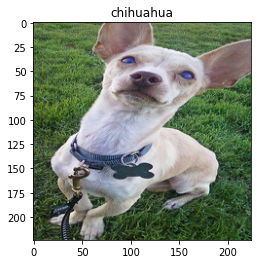

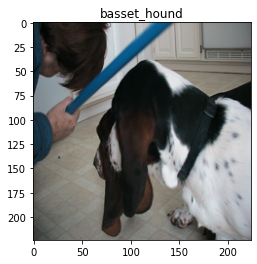

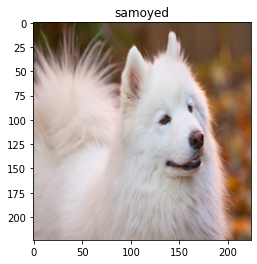

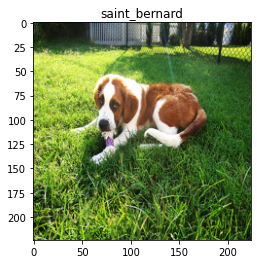

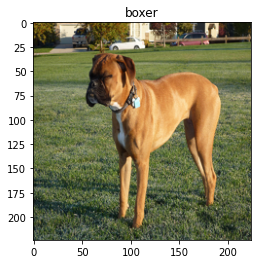

In [ ]:
# 제대로 가져왔는지 확인
for image, label in train_dataset.take(5):
    plt.imshow(image[0])
    title = class_list[label[0].numpy()]
    plt.title(title)
    plt.show()

# model 생성

In [ ]:
# seqential API를 이용해 model 구성
def create_model():
  model = keras.Sequential()
  # 유닛 : 32, 커널 3x3
  model.add(keras.layers.Conv2D(32, 3, activation='relu', padding='SAME', input_shape = (IMG_SIZE, IMG_SIZE, 3)))
  # 디폴트값 (2,2)
  model.add(keras.layers.MaxPool2D(padding='SAME'))
  model.add(keras.layers.Conv2D(64, 3, activation='relu', padding='SAME'))
  model.add(keras.layers.MaxPool2D(padding='SAME'))
  model.add(keras.layers.Conv2D(128, 3, activation='relu', padding='SAME'))
  model.add(keras.layers.MaxPool2D(padding='SAME'))
  model.add(keras.layers.Conv2D(256, 3, activation='relu', padding='SAME'))
  model.add(keras.layers.MaxPool2D(padding='SAME'))
  model.add(keras.layers.Conv2D(256, 3, activation='relu', padding='SAME'))
  model.add(keras.layers.MaxPool2D(padding='SAME'))
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(1024, activation='relu'))
  model.add(keras.layers.Dropout(0.4))
  model.add(keras.layers.Dense(N_CLASS, activation='softmax'))
  return model

# 모델 생성
model = create_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
              # sparse : 알아서 one-hot 해줌
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 56, 56, 128)       73856     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 28, 28, 128)       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 28, 28, 256)      

In [ ]:
history = model.fit(train_dataset, 
                    epochs=N_EPOCHS, 
                    steps_per_epoch=steps_per_epoch, 
                    validation_data=val_dataset, 
                    validation_steps=val_steps)

Epoch 1/20
148/148 [==============================] - 865s 6s/step - loss: 3.6081 - accuracy: 0.0323 - val_loss: 3.4508 - val_accuracy: 0.0652
Epoch 2/20
148/148 [==============================] - 858s 6s/step - loss: 3.3679 - accuracy: 0.0976 - val_loss: 3.1491 - val_accuracy: 0.1344
Epoch 3/20
148/148 [==============================] - 862s 6s/step - loss: 3.0391 - accuracy: 0.1632 - val_loss: 2.9900 - val_accuracy: 0.1783
Epoch 4/20
148/148 [==============================] - 865s 6s/step - loss: 2.8368 - accuracy: 0.2143 - val_loss: 2.8195 - val_accuracy: 0.2085
Epoch 5/20
148/148 [==============================] - 861s 6s/step - loss: 2.5558 - accuracy: 0.2766 - val_loss: 2.7589 - val_accuracy: 0.2311
Epoch 6/20
112/148 [=====================>........] - ETA: 3:15 - loss: 2.3279 - accuracy: 0.3438

In [ ]:
# 오버피팅이 심해서 다시 만들어봄

# seqential API를 이용해 model 구성
def create_bn_model():
  model = keras.Sequential()
  # 유닛 : 32, 커널 3x3
  model.add(keras.layers.Conv2D(32, 3, padding='SAME', input_shape = (IMG_SIZE, IMG_SIZE, 3)))
  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.ReLU())
  # 디폴트값 (2,2)
  model.add(keras.layers.MaxPool2D(padding='SAME'))
  model.add(keras.layers.Conv2D(64, 3, padding='SAME'))
  # Relu를 따로 해주는 이유가 같이 해주면 Relu를 먼저 수행하기 때문
  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.ReLU())
  model.add(keras.layers.MaxPool2D(padding='SAME'))
  model.add(keras.layers.Conv2D(128, 3, padding='SAME'))
  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.ReLU())
  model.add(keras.layers.MaxPool2D(padding='SAME'))
  model.add(keras.layers.Conv2D(256, 3, padding='SAME'))
  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.ReLU())
  model.add(keras.layers.MaxPool2D(padding='SAME'))
  model.add(keras.layers.Conv2D(256, 3, padding='SAME'))
  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.ReLU())
  model.add(keras.layers.MaxPool2D(padding='SAME'))
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(1024))
  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.ReLU())
  model.add(keras.layers.Dense(N_CLASS, activation='softmax'))
  return model

# 모델 생성
model = create_bn_model()

# learning rate scheduling
Ir_schedule = keras.optimizers.schedule.ExponentialDecay(initial_learning_rate=learning_rate,
                                                         # 얼마마다 learning 줄일거냐 / 5 epoch 지났을 때마다
                                                         decay_steps=steps_per_epoch*5,
                                                         # 0.5를 곱할거다 = 절반으로 줄일거다
                                                         decay_rate=0.5,
                                                         # 6일때 절반으로 줄여라(계단식) / False면 점점 줄어드는
                                                         staircase=True)

model.compile(optimizer=tf.keras.optimizers.Adam(Ir_schedule),
              # sparse : 알아서 one-hot 해줌
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

In [ ]:
history = model.fit(train_dataset, 
                    epochs=N_EPOCHS, 
                    steps_per_epoch=steps_per_epoch, 
                    validation_data=val_dataset, 
                    validation_steps=val_steps)